In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [2]:
data_path = 'solar_dataset' # make sure this folder contains 6 class folders

In [3]:
import matplotlib.pyplot as plt


In [4]:

!where python

c:\Users\jitu0\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\jitu0\AppData\Local\Microsoft\WindowsApps\python.exe


In [5]:
img_height = 128
img_width = 128
batch_size = 32

In [6]:
datagen = ImageDataGenerator(
rescale=1./255,
validation_split=0.2,
rotation_range=20,
zoom_range=0.2,
horizontal_flip=True
)

In [7]:
data_path='solar_dataset'

In [8]:
train_gen = datagen.flow_from_directory(
data_path,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
subset='training'
)

val_gen = datagen.flow_from_directory(
data_path,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
subset='validation'
)

Found 1193 images belonging to 2 classes.
Found 297 images belonging to 2 classes.


In [9]:
class_names = list(train_gen.class_indices.keys())
print("Class Labels:", class_names)

Class Labels: ['train', 'val']


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')  # Number of classes
])

c:\Users\jitu0\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Train the Model

epochs = 15
history = model.fit(
train_gen,
validation_data=val_gen,
epochs=epochs
)

c:\Users\jitu0\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5968 - loss: 0.6993 - val_accuracy: 0.6229 - val_loss: 0.6760
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6236 - loss: 0.6618 - val_accuracy: 0.6229 - val_loss: 0.6814
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6245 - loss: 0.6685 - val_accuracy: 0.6229 - val_loss: 0.6714
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.6178 - loss: 0.6494 - val_accuracy: 0.5993 - val_loss: 0.6650
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6429 - loss: 0.6214 - val_accuracy: 0.5589 - val_loss: 0.6871
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6270 - loss: 0.6383 - val_accuracy: 0.5960 - val_loss: 0.6701
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6496 - loss: 0.6183 - val_accuracy: 0.5657 - val_loss: 0.6941
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6262 - loss: 0.6374 - val_accuracy: 0.5892 - val_loss

In [13]:
#Ploting Accuracy and Loss
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

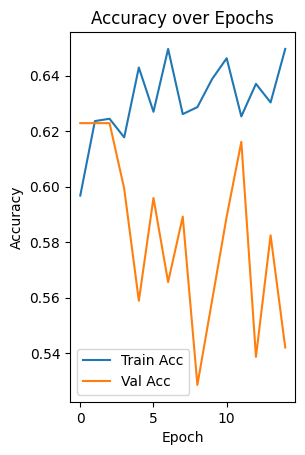

In [14]:
#Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

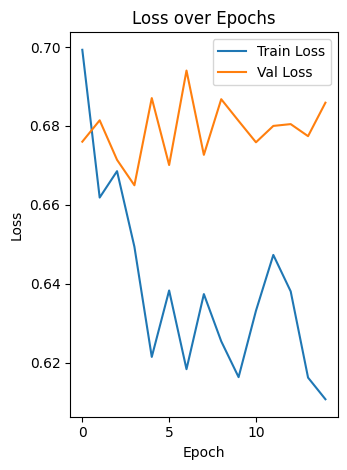

In [15]:
#Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Predict on validation data
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


In [17]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(val_gen.class_indices.keys())

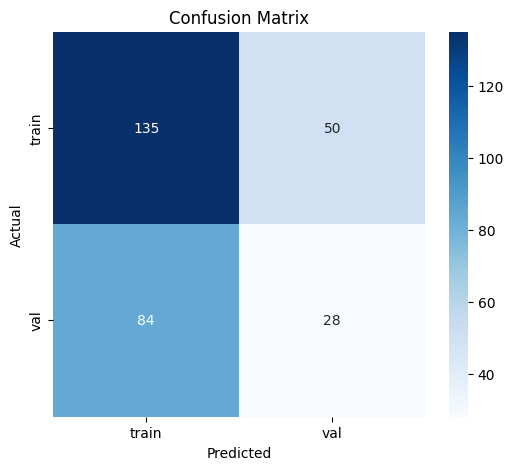

In [18]:
# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
#Saving the model as .h5
model.save("solar_model.h5")
print("Model saved as solar_model.h5")

Model saved as solar_model.h5


In [20]:
# Load the trained model
model = tf.keras.models.load_model("solar_model.h5")

In [21]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\jitu0\AppData\Local\Temp\tmpbs6ongy4\assets


INFO:tensorflow:Assets written to: C:\Users\jitu0\AppData\Local\Temp\tmpbs6ongy4\assets


Saved artifact at 'C:\Users\jitu0\AppData\Local\Temp\tmpbs6ongy4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2415740509008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265219792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265220176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265210960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265218256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265213648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265214224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265213264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265217104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2414265218448: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [22]:
# Save the TFLite model file
with open("solar_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted and saved as solar_model.tflite")

Model converted and saved as solar_model.tflite
